In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from argparse import Namespace
from pathlib import Path
import torch
from pytorch_lightning.trainer import Trainer, seed_everything
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

from turboflow.dataloaders import TurboFlowDataModule
from turboflow.evaluation import compute_all_metrics

from turboflow.utils import phy_utils as phy
from turboflow.utils import torch_utils as tch

In [ ]:
seed_everything(42, workers=True)

In [5]:
# load dataset
data_dir = Path('/','home','dicarlo_d','Documents','Datasets','Turb2D.hdf5')
dm = TurboFlowDataModule(dataset='Turb2D', 
                         data_dir=data_dir,
                         batch_size=100000,
                         time_idx=33,
                         train_downsampling=4,
                         val_downsampling=4,
                         test_downsampling=4,
                         num_workers=1)
dm.setup()

In [6]:
# choose the hyperparams
hparams = {
    'name':'RFFNet',
    'mlp_layers_num': 3,
    'mlp_layers_dim': 256, 
    'mlp_last_actfn': 'tanh',
    'do_rff': True, 
    'rff_num': 512, 
    'rff_scale': 10,
    'do_divfree': False,
    'lam_pde': 0,     # soft constr. grad(u,v)=0
    'lam_div': 0,     # spatial grad(u,v) = torch.autograd(u,v)
    'lam_reg': 0,     # offgrid L2 reg. on grad of the potential
    'lam_sfn': 0,     # offgrid L2 reg. on Sfun
    'lam_spec': 0,    # L2 diff on the spectrum
    'lam_grads':0,    # offrgid L2 reg. on grad and autograd
    'lam_weight': 0,  # L2 reg on the NN's weights
    'sfn_min_x': 0.00784314,
    'sfn_num_centers': 50,
    'sfn_num_increments':3,
    'sfn_patch_dim': 30
}

In [7]:
early_stop_callback = EarlyStopping(monitor='val_loss')
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    dirpath=".torch_checkpoints",
    filename="Turb2D-%s-{epoch:02d}-{val_loss:.2f}" % (hparams['name']),
    save_top_k=1,
    mode="min",
)

trainer = Trainer(gpus=1,
                  max_epochs=5000, 
                  log_every_n_steps=20,
                  check_val_every_n_epoch=20, 
                  callbacks=[early_stop_callback,
                             checkpoint_callback])

from turboflow.models.phyrff_hard import plDivFreeRFFNet
model = plDivFreeRFFNet(**vars(Namespace(**hparams)))

trainer.fit(model, dm)
trainer.test(model, dm)

/home/dicarlo_d/Documents/Code/TurboSuperResultion/venv/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:446: UserWarning: Checkpoint directory .torch_checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/dicarlo_d/Documents/Code/TurboSuperResultion/venv/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:423: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2021-11-24 16:04:09.348590: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-1

Validation sanity check: 0it [00:00, ?it/s]

/home/dicarlo_d/Documents/Code/TurboSuperResultion/venv/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
Global seed set to 42
/home/dicarlo_d/Documents/Code/TurboSuperResultion/venv/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/dicarlo_d/Documents/Code/TurboSuperResultion/venv/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:326: UserWarning: The numb

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/home/dicarlo_d/Documents/Code/TurboSuperResultion/venv/lib/python3.8/site-packages/pytorch_lightning/core/datamodule.py:423: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/dicarlo_d/Documents/Code/TurboSuperResultion/venv/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, test dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 48 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test/metrics/angular_degree': 0.008718131110072136,
 'test/metrics/log_err_specturm': 0.008873295970261097,
 'test/metrics/reconstruction': 6.88094274892137e-08}
--------------------------------------------------------------------------------


[{'test/metrics/reconstruction': 6.88094274892137e-08,
  'test/metrics/angular_degree': 0.008718131110072136,
  'test/metrics/log_err_specturm': 0.008873295970261097}]

torch.Size([4096, 2]) torch.Size([4096, 2])
torch.Size([4096, 2]) torch.Size([4096, 2])
torch.Size([4096, 2])
torch.Size([4096, 2])


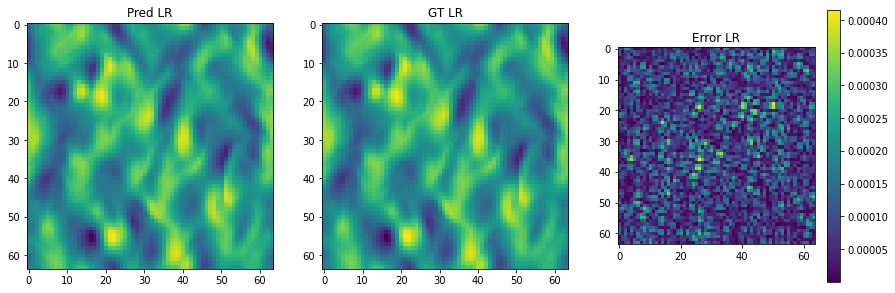

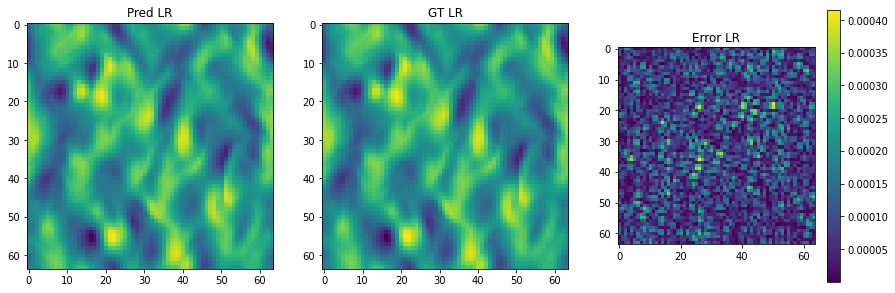

In [8]:
X_lr, y_lr = dm.val_dataset[:]
img_shape_lr = dm.val_dataset.img_shape[:2]
shape_lr = dm.val_dataset.img_shape
L = img_shape_lr[0]

X_hr, y_hr = dm.test_dataset[:]
img_shape_hr = dm.test_dataset.img_shape[:2]
shape_hr = dm.test_dataset.img_shape
H = img_shape_hr[0]

print(X_lr.shape, y_lr.shape)
print(X_hr.shape, y_hr.shape)

y_hat_lr, P_hat_lr = model(X_lr)
y_hat_hr, P_hat_hr = model(X_hr)

print(y_hat_lr.shape)
print(y_hat_hr.shape)

reshape = lambda x : x.reshape(*img_shape_lr).detach()

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Pred LR')
plt.imshow(reshape(y_hat_lr[:,0]))
plt.subplot(132)
plt.title('GT LR')
plt.imshow(reshape(y_lr[:,0]))
plt.subplot(133)
plt.title('Error LR')
plt.imshow(reshape(torch.abs(y_lr[:,0] - y_hat_lr[:,0])))
plt.colorbar()
plt.show()


reshape = lambda x : x.reshape(*img_shape_hr).detach()
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Pred LR')
plt.imshow(reshape(y_hat_hr[:,0]))
plt.subplot(132)
plt.title('GT LR')
plt.imshow(reshape(y_hr[:,0]))
plt.subplot(133)
plt.title('Error LR')
im = plt.imshow(reshape(torch.abs(y_hr[:,0] - y_hat_hr[:,0])))
plt.colorbar()
plt.show()

In [9]:
from kornia.filters import SpatialGradient
sp_grad = SpatialGradient(mode='diff',normalized=False)

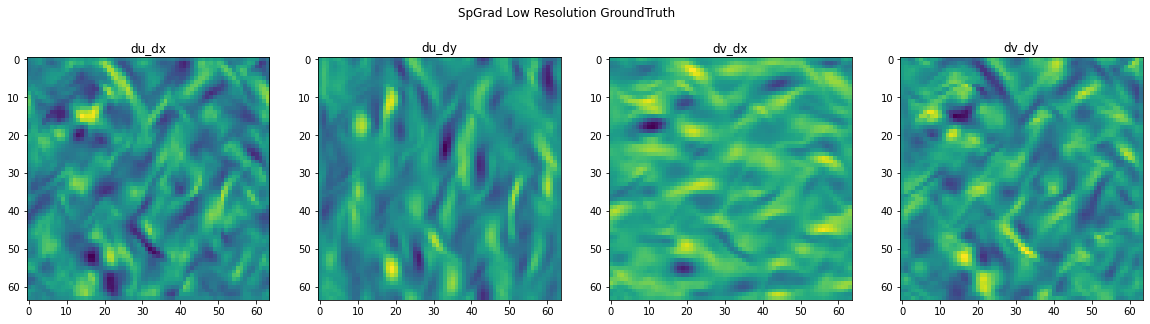

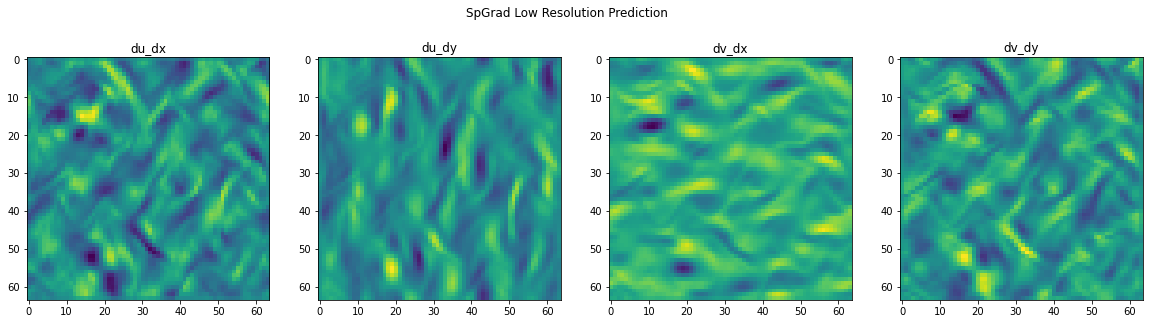

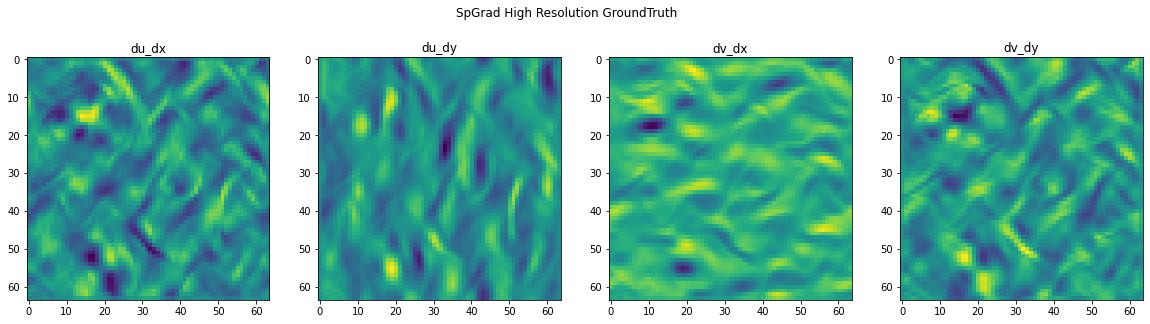

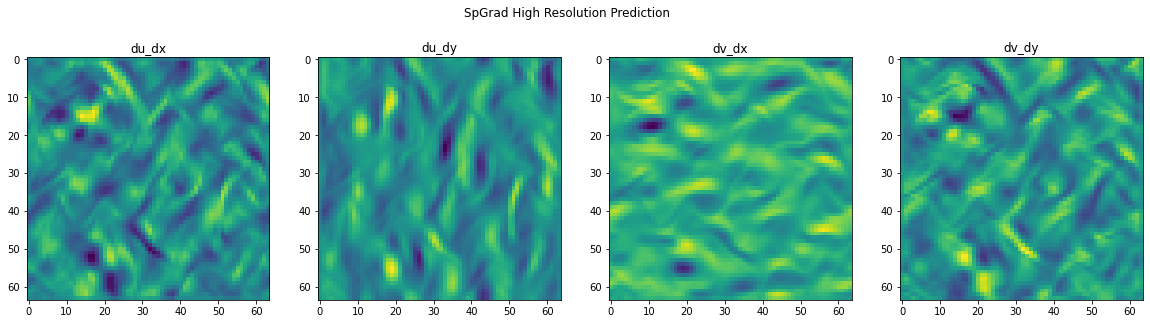

In [10]:
# compute the spatial gradient of the groundtruth
y_img = y_lr.view(1,L,L,2).permute(0,3,1,2)
grads = sp_grad(y_img)
img_u_x = grads[0,0,1,...] # we take this inverted as it was we are doing ij indexing
img_u_y = grads[0,0,0,...] # we take this inverted as it was we are doing ij indexing
img_v_x = grads[0,1,1,...] # we take this inverted as it was we are doing ij indexing
img_v_y = grads[0,1,0,...] # we take this inverted as it was we are doing ij indexing

plt.figure(figsize=(20,5))
plt.suptitle('SpGrad Low Resolution GroundTruth')
plt.subplot(141)
plt.title('du_dx')
plt.imshow(img_u_x.detach())
plt.subplot(142)
plt.title('du_dy')
plt.imshow(img_u_y.detach())
plt.subplot(143)
plt.title('dv_dx')
plt.imshow(img_v_x.detach())
plt.subplot(144)
plt.title('dv_dy')
plt.imshow(img_v_y.detach())
plt.show()

y_img = y_hat_lr.view(1,L,L,2).permute(0,3,1,2)
grads = sp_grad(y_img)
img_u_x = grads[0,0,1,...] # we take this inverted as it was we are doing ij indexing
img_u_y = grads[0,0,0,...] # we take this inverted as it was we are doing ij indexing
img_v_x = grads[0,1,1,...] # we take this inverted as it was we are doing ij indexing
img_v_y = grads[0,1,0,...] # we take this inverted as it was we are doing ij indexing

plt.figure(figsize=(20,5))
plt.suptitle('SpGrad Low Resolution Prediction')
plt.subplot(141)
plt.title('du_dx')
plt.imshow(img_u_x.detach())
plt.subplot(142)
plt.title('du_dy')
plt.imshow(img_u_y.detach())
plt.subplot(143)
plt.title('dv_dx')
plt.imshow(img_v_x.detach())
plt.subplot(144)
plt.title('dv_dy')
plt.imshow(img_v_y.detach())
plt.show()


y_img_hat = y_hr.view(1,H,H,2).permute(0,3,1,2)
grads = sp_grad(y_img_hat)
img_u_x = grads[0,0,1,...] # we take this inverted as it was we are doing ij indexing
img_u_y = grads[0,0,0,...] # we take this inverted as it was we are doing ij indexing
img_v_x = grads[0,1,1,...] # we take this inverted as it was we are doing ij indexing
img_v_y = grads[0,1,0,...] # we take this inverted as it was we are doing ij indexing

plt.figure(figsize=(20,5))
plt.suptitle('SpGrad High Resolution GroundTruth')
plt.subplot(141)
plt.title('du_dx')
plt.imshow(img_u_x.detach())
plt.subplot(142)
plt.title('du_dy')
plt.imshow(img_u_y.detach())
plt.subplot(143)
plt.title('dv_dx')
plt.imshow(img_v_x.detach())
plt.subplot(144)
plt.title('dv_dy')
plt.imshow(img_v_y.detach())
plt.show()


y_img_hat = y_hat_hr.view(1,H,H,2).permute(0,3,1,2)
grads = sp_grad(y_img_hat)
img_u_x = grads[0,0,1,...] # we take this inverted as it was we are doing ij indexing
img_u_y = grads[0,0,0,...] # we take this inverted as it was we are doing ij indexing
img_v_x = grads[0,1,1,...] # we take this inverted as it was we are doing ij indexing
img_v_y = grads[0,1,0,...] # we take this inverted as it was we are doing ij indexing

plt.figure(figsize=(20,5))
plt.suptitle('SpGrad High Resolution Prediction')
plt.subplot(141)
plt.title('du_dx')
plt.imshow(img_u_x.detach())
plt.subplot(142)
plt.title('du_dy')
plt.imshow(img_u_y.detach())
plt.subplot(143)
plt.title('dv_dx')
plt.imshow(img_v_x.detach())
plt.subplot(144)
plt.title('dv_dy')
plt.imshow(img_v_y.detach())
plt.show()

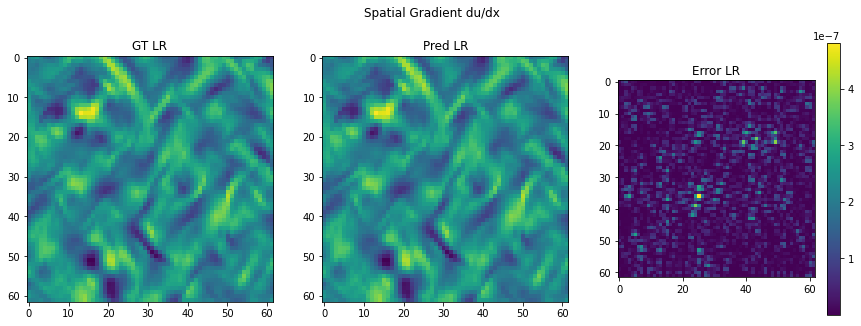

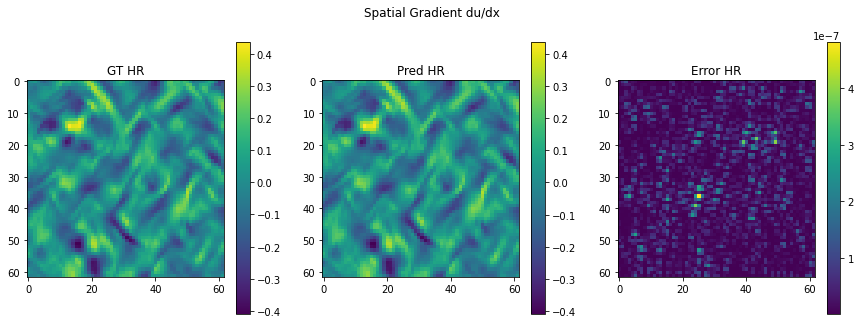

In [11]:
# compute the spatial gradient of the groundtruth
grads = sp_grad(y_lr.view(1,L,L,2).permute(0,3,1,2))
img_u_x_lr = grads[0,0,1,...] # we take this inverted as it was we are doing ij indexing

grads = sp_grad(y_hat_lr.view(1,L,L,2).permute(0,3,1,2))
img_u_x_hat_lr = grads[0,0,1,...] # we take this inverted as it was we are doing ij indexing

grads = sp_grad(y_hr.view(1,H,H,2).permute(0,3,1,2))
img_u_x_hr = grads[0,0,1,...] # we take this inverted as it was we are doing ij indexing

grads = sp_grad(y_hat_hr.view(1,H,H,2).permute(0,3,1,2))
img_u_x_hat_hr = grads[0,0,1,...] # we take this inverted as it was we are doing ij indexing

internal = lambda x : x[1:-1:,1:-1:].detach()


plt.figure(figsize=(15,5))
plt.suptitle('Spatial Gradient du/dx')
plt.subplot(131)
plt.title('GT LR')
plt.imshow(internal(img_u_x_lr))
plt.subplot(132)
plt.title('Pred LR')
plt.imshow(internal(img_u_x_hat_lr))
plt.subplot(133)
plt.title('Error LR')
plt.imshow(internal(torch.abs(img_u_x_lr-img_u_x_hat_lr)**2))
plt.colorbar()
plt.show()

plt.figure(figsize=(15,5))
plt.suptitle('Spatial Gradient du/dx')
plt.subplot(131)
plt.title('GT HR')
plt.imshow(internal(img_u_x_hr))
plt.colorbar()
plt.subplot(132)
plt.title('Pred HR')
plt.imshow(internal(img_u_x_hat_hr))
plt.colorbar()
plt.subplot(133)
plt.title('Error HR')
plt.imshow(internal(torch.abs(img_u_x_hr-img_u_x_hat_hr)**2))
plt.colorbar()
plt.show()

tensor([-0.0639, -0.0234,  0.0115,  0.0392, -0.0281, -0.1057, -0.1325, -0.0957,
        -0.0457,  0.0244,  0.1104,  0.1848,  0.1489,  0.1180,  0.1292,  0.0540,
         0.0674,  0.1072,  0.1324,  0.2265,  0.2959,  0.2074,  0.0842, -0.0547,
        -0.1801, -0.1920, -0.1213, -0.0478,  0.0229,  0.1010,  0.1451,  0.1239,
         0.0578, -0.0187, -0.0970, -0.1436, -0.1497, -0.1329, -0.1320, -0.2130,
        -0.2966, -0.3247, -0.2579, -0.1145,  0.0580,  0.1968,  0.2163,  0.1519,
         0.1617,  0.1251,  0.1707,  0.1518,  0.0344, -0.0863, -0.0491, -0.0310,
        -0.0154,  0.0486,  0.1030,  0.0787, -0.0860, -0.2730, -0.2397, -0.1315])
tensor([-0.0570, -0.0316, -0.0272, -0.0088, -0.0565, -0.1265, -0.2654, -0.0960,
        -0.0905,  0.0065,  0.0715,  0.1411,  0.0292,  0.0063,  0.0555,  0.0639,
         0.0430,  0.0944,  0.0688,  0.1041,  0.2347,  0.1704,  0.1463,  0.0678,
        -0.0374, -0.0244, -0.0698, -0.0626, -0.0837,  0.0185,  0.1039,  0.1177,
         0.0059, -0.0191, -0.0185, -0.1

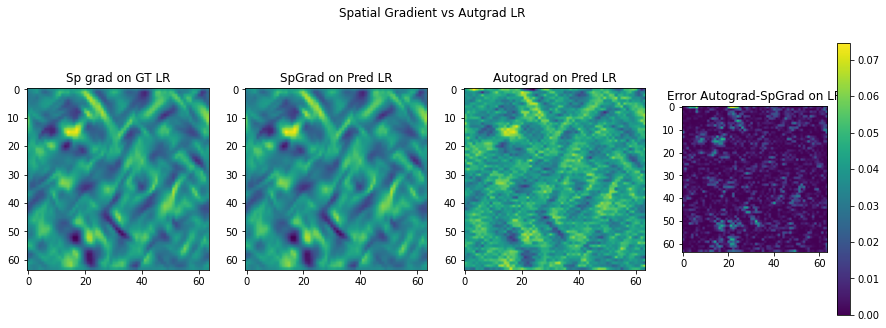

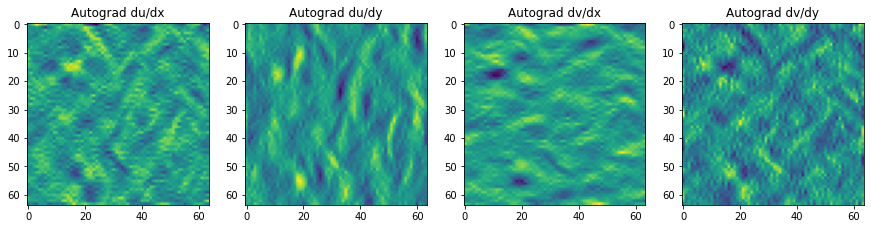

In [12]:
y_hat_lr = model(X_lr.requires_grad_(True))[0]
y_hat_hr = model(X_hr.requires_grad_(True))[0]

# compute the gradient of the prediction with autograd
u, v = torch.split(y_hat_lr,1,-1)
du_xy = torch.autograd.grad(u, X_lr, torch.ones_like(u), create_graph=True)[0]
dv_xy = torch.autograd.grad(v, X_lr, torch.ones_like(v), create_graph=True)[0]
du_x = du_xy[:,0].reshape(L,L) / L
du_y = du_xy[:,1].reshape(L,L) / L
dv_x = dv_xy[:,0].reshape(L,L) / L
dv_y = dv_xy[:,1].reshape(L,L) / L

print(img_u_x_lr[1])
print(du_x[1] )

internal = lambda x : x.detach()

plt.figure(figsize=(15,5))
plt.suptitle('Spatial Gradient vs Autgrad LR')
plt.subplot(141)
plt.title('Sp grad on GT LR')
plt.imshow(internal(img_u_x_lr))
plt.subplot(142)
plt.title('SpGrad on Pred LR')
plt.imshow(internal(img_u_x_hat_lr))
plt.subplot(143)
plt.title('Autograd on Pred LR')
plt.imshow(internal(du_x))
plt.subplot(144)
plt.title('Error Autograd-SpGrad on LR')
plt.imshow(internal((du_x - img_u_x_hat_lr)**2))
plt.colorbar()
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(141)
plt.title('Autograd du/dx')
plt.imshow(internal(du_x))
plt.subplot(142)
plt.title('Autograd du/dy')
plt.imshow(internal(du_y))
plt.subplot(143)
plt.title('Autograd dv/dx')
plt.imshow(internal(dv_x))
plt.subplot(144)
plt.title('Autograd dv/dy')
plt.imshow(internal(dv_y))
plt.show()

y_hat_hr = model(X_hr.requires_grad_(True))[0]

# compute the gradient of the prediction with autograd
u, v = torch.split(y_hat_hr,1,-1)
du_xy = torch.autograd.grad(u, X_hr, torch.ones_like(u), create_graph=True)[0]
dv_xy = torch.autograd.grad(v, X_hr, torch.ones_like(v), create_graph=True)[0]
du_x = du_xy[:,0].reshape(H,H)
du_y = du_xy[:,1].reshape(H,H)
dv_x = dv_xy[:,0].reshape(H,H)
dv_y = dv_xy[:,1].reshape(H,H)

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Spatial Gradient vs Autgrad LR')
plt.subplot(141)
plt.title('Sp grad on GT HR')
plt.imshow(internal(img_u_x_hr))
plt.subplot(142)
plt.title('SpGrad on Pred HR')
plt.imshow(internal(img_u_x_hat_hr))
plt.subplot(143)
plt.title('Autograd on Pred HR')
plt.imshow(internal(du_x))
plt.subplot(144)
plt.title('Error Autograd-SpGrad on HR')
plt.imshow(internal((du_x - img_u_x_hat_hr)**2))
plt.colorbar()
plt.show()

In [ ]:
x = X_lr[:,0].detach()
y = X_lr[:,1].detach()
u = y_hat_lr[:,0].detach()
v = y_hat_lr[:,1].detach()

s = 1
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.quiver(x.reshape(*img_shape_lr)[::s,::s], 
           y.reshape(*img_shape_lr)[::s,::s],
           u.reshape(*img_shape_lr)[::s,::s],
           v.reshape(*img_shape_lr)[::s,::s], scale=10)
plt.subplot(122)
plt.quiver(        x.reshape(*img_shape_lr)[::s,::s], 
                   y.reshape(*img_shape_lr)[::s,::s],
           y_lr[:,0].reshape(*img_shape_lr)[::s,::s],
           y_lr[:,1].reshape(*img_shape_lr)[::s,::s], scale=10)

In [ ]:
x = X_lr[:,0].detach()
y = X_lr[:,1].detach()
u_diff = y_hat_lr[:,0].detach() - y_lr[:,0].detach()
v_diff = y_hat_lr[:,1].detach() - y_lr[:,1].detach()

s = 1
plt.figure(figsize=(10,10))
plt.quiver(x.reshape(*img_shape_lr)[::s,::s], 
           y.reshape(*img_shape_lr)[::s,::s],
           u_diff.reshape(*img_shape_lr)[::s,::s],
           v_diff.reshape(*img_shape_lr)[::s,::s], scale=10)

In [ ]:
s = 1
plt.figure(figsize=(10,10))
plt.streamplot(        
           x.reshape(*img_shape_lr)[::s,::s].T.numpy(), 
           y.reshape(*img_shape_lr)[::s,::s].T.numpy(),
           y_lr[:,0].reshape(*img_shape_lr)[::s,::s].T.numpy(),
           y_lr[:,1].reshape(*img_shape_lr)[::s,::s].T.numpy(), density=2)
plt.streamplot(x.reshape(*img_shape_lr)[::s,::s].T.numpy(), 
           y.reshape(*img_shape_lr)[::s,::s].T.numpy(),
           u.reshape(*img_shape_lr)[::s,::s].T.numpy(),
           v.reshape(*img_shape_lr)[::s,::s].T.numpy(), density=2)

In [ ]:
x = X_hr[:,0].detach()
y = X_hr[:,1].detach()
u = y_hat_hr[:,0].detach()
v = y_hat_hr[:,1].detach()

s = 4
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.quiver(x.reshape(*img_shape_hr)[::s,::s], 
           y.reshape(*img_shape_hr)[::s,::s],
           u.reshape(*img_shape_hr)[::s,::s],
           v.reshape(*img_shape_hr)[::s,::s], scale=10)
plt.subplot(122)
plt.quiver(        x.reshape(*img_shape_hr)[::s,::s], 
                   y.reshape(*img_shape_hr)[::s,::s],
           y_hr[:,0].reshape(*img_shape_hr)[::s,::s],
           y_hr[:,1].reshape(*img_shape_hr)[::s,::s], scale=10)

In [ ]:
s = 1
plt.figure(figsize=(20,20))
plt.streamplot(
           x.reshape(*img_shape_hr)[::s,::s].T.numpy(), 
           y.reshape(*img_shape_hr)[::s,::s].T.numpy(),
           u.reshape(*img_shape_hr)[::s,::s].T.numpy(),
           v.reshape(*img_shape_hr)[::s,::s].T.numpy(),density=3)
plt.streamplot(        
           x.reshape(*img_shape_hr)[::s,::s].T.numpy(), 
           y.reshape(*img_shape_hr)[::s,::s].T.numpy(),
           y_hr[:,0].reshape(*img_shape_hr)[::s,::s].T.numpy(),
           y_hr[:,1].reshape(*img_shape_hr)[::s,::s].T.numpy(),density=3)

In [ ]:
x = X_hr[:,0].detach()
y = X_hr[:,1].detach()
u = y_hat_hr[:,0].detach()
v = y_hat_hr[:,1].detach()

d = 1
l = 64
s = 10
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.quiver(x.reshape(*img_shape_hr)[:l:d,:l:d], 
           y.reshape(*img_shape_hr)[:l:d,:l:d],
           u.reshape(*img_shape_hr)[:l:d,:l:d],
           v.reshape(*img_shape_hr)[:l:d,:l:d], scale=s)
plt.subplot(122)
plt.quiver(        x.reshape(*img_shape_hr)[:l:d,:l:d], 
                   y.reshape(*img_shape_hr)[:l:d,:l:d],
           y_hr[:,0].reshape(*img_shape_hr)[:l:d,:l:d],
           y_hr[:,1].reshape(*img_shape_hr)[:l:d,:l:d], scale=s)

In [ ]:
x = X_hr[:,0].detach()
y = X_hr[:,1].detach()
u = y_hat_hr[:,0].detach()
v = y_hat_hr[:,1].detach()

d = 1
l = 64
s = 10
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(u.reshape(*img_shape_hr)[:l:d,:l:d])
plt.subplot(122)
plt.imshow(y_hr[:,0].reshape(*img_shape_hr)[:l:d,:l:d])
plt.show()
plt.imshow((y_hr[:,0]-u).reshape(*img_shape_hr)[:l:d,:l:d])
plt.colorbar()

In [ ]:
print(compute_all_metrics(y_hat_lr, y_lr))
print(compute_all_metrics(y_hat_hr, y_hr))

In [ ]:
spec_ns, k_ns = phy.energy_spectrum(torch.randn(*shape_hr).permute(2,0,1))

plt.loglog(k_ns, spec_ns)

In [ ]:
# compute spectrum
spec_ns = phy.energy_spectrum(torch.randn(*shape_hr).permute(2,0,1))[0]
spec_lr, k_lr = phy.energy_spectrum(y_lr.view(*shape_lr).permute(2,0,1))
spec_hr, k_hr = phy.energy_spectrum(y_hr.view(*shape_hr).permute(2,0,1))

# plt.loglog(spec_ns)
plt.loglog(k_lr, spec_lr)
plt.loglog(k_hr, spec_hr)

# torch.save(spec_hr, '../data/hr_spect128.pt')

In [ ]:
# compute spectrum
spec_ns = phy.energy_spectrum(torch.randn(*shape_hr).permute(2,0,1))[0]
spec_lr = phy.energy_spectrum(y_lr.view(*shape_lr).permute(2,0,1))[0]
spec_hr = phy.energy_spectrum(y_hr.view(*shape_hr).permute(2,0,1))[0]

spec_lr_pred = phy.energy_spectrum(y_hat_lr.view(*shape_lr).permute(2,0,1))[0]
spec_hr_pred = phy.energy_spectrum(y_hat_hr.view(*shape_hr).permute(2,0,1))[0]

# plt.loglog(spec_ns)
plt.loglog(spec_lr)
plt.loglog(spec_hr)
plt.loglog(spec_lr_pred.detach())
plt.loglog(spec_hr_pred.detach())


In [ ]:
# spec error
spec_log_error_lr = torch.norm(torch.log(spec_lr_pred+1e-20) - torch.log(spec_lr+1e-20))**2
spec_log_error_hr = torch.norm(torch.log(spec_hr_pred+1e-20) - torch.log(spec_hr+1e-20))**2

print(spec_error_lr.item())
print(spec_error_hr.item())

In [ ]:
# angular error
def ang_error(x, x_ref, avg=True):
    assert x.shape == x_ref.shape
    assert x.shape[1] == 2
    N = x.shape[0]
    
    w1 = torch.cat([x, torch.ones(x.shape[0], 1)], dim=1)
    w2 = torch.cat([x_ref, torch.ones(x_ref.shape[0], 1)], dim=1)
    
    err = torch.sum(w1 * w2, dim=1) / (torch.norm(w1, dim=1) * torch.norm(w2, dim=1))
    assert err.sum() < N
    err = torch.rad2deg(torch.acos(err))
    if avg:
        return err.mean()
    return err
    

ang_err_lr = ang_error(y_lr, y_hat_lr, avg=True)
ang_err_hr = ang_error(y_hr, y_hat_hr, avg=True)

print(torch.max(ang_error(y_lr, y_hat_lr, avg=False)))
print(torch.max(ang_error(y_hr, y_hat_hr, avg=False)))


In [ ]:
model = plDivFreeRFFNet.load_from_checkpoint(checkpoint_callback.best_model_path)
trainer.test(model, dm)

In [ ]:
spec_lr_err = phy.energy_spectrum(((y_hat_lr-y_lr)**2).view(*img_shape_lr).permute(2,0,1))[0]
spec_hr_err = phy.energy_spectrum(((y_hat_hr-y_hr)**2).view(*img_shape_hr).permute(2,0,1))[0]

plt.loglog(spec_lr_err.detach())
plt.loglog(spec_hr_err.detach())

In [ ]:
y_hat, Py_hat = model(X_lr)
u, v = torch.split(y_hat,1,-1)
du_xy = torch.autograd.grad(u, X_lr, torch.ones_like(u), create_graph=True)[0]       
dv_xy = torch.autograd.grad(v, X_lr, torch.ones_like(v), create_graph=True)[0]
# div_autograd = du_xy[...,0] + dv_xy[...,1]
div_autograd = dv_xy[...,1]
div_autograd = div_autograd.view(*img_shape_lr[:2])

plt.imshow(div_autograd.detach())
plt.colorbar()
plt.show()

du_x = tch._my_field_grad(y_hat.view(*img_shape_lr)[:,:,0], 1)
du_y = tch._my_field_grad(y_hat.view(*img_shape_lr)[:,:,1], 0)
div_numerical = du_y
    
plt.imshow(div_numerical.detach())
plt.colorbar()
plt.show()

plt.imshow((div_numerical - div_autograd).detach())
plt.colorbar()
plt.show()


In [ ]:
y_hat, Py_hat = model(X_hr)
u, v = torch.split(y_hat,1,-1)
du_xy = torch.autograd.grad(u, X_hr, torch.ones_like(u), create_graph=True)[0]       
dv_xy = torch.autograd.grad(v, X_hr, torch.ones_like(v), create_graph=True)[0]
# div_autograd = du_xy[...,0] + dv_xy[...,1]
div_autograd = dv_xy[...,1]
div_autograd = div_autograd.view(*img_shape_hr[:2])

plt.imshow(div_autograd[2:-2,2:-2].detach())
plt.colorbar()
plt.show()

du_x = tch._my_field_grad(y_hat.view(*img_shape_hr)[:,:,0], 1)
du_y = tch._my_field_grad(y_hat.view(*img_shape_hr)[:,:,1], 0)
div_numerical = du_y
    
plt.imshow(div_numerical[2:-2,2:-2].detach())
plt.colorbar()
plt.show()

plt.imshow((div_numerical[2:-2,2:-2] - div_autograd[2:-2,2:-2]).detach())
plt.colorbar()
plt.show()
